<a href="https://colab.research.google.com/github/bivekpok/DSPS_BPokhrel/blob/main/HW7/HW7_pokhrel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install umap-learn
!pip install umap-learn[plot]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=bf630296077625223e754fa28ff1a6ace0ffc482b16edd52a2763a1a0f82a24e
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=26e664903f92441a08ee0b5ea5744b1a80e4cc6218767c806a82672f9a15b1d9
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 33.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import pylab as plt
import scipy as sp
import sklearn as skl
from sklearn import cluster
import umap
import umap.plot
from scipy.cluster.hierarchy import dendrogram, linkage
import missingno as msno

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)
/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# I  read the data
in https://github.com/fedhere/DSPS_FBianco/tree/master/HW7
its called kidpackgene.csv

In [3]:
csv_url = 'https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW7/kidpackgenes.csv'
genes = pd.read_csv(csv_url, index_col=None)

make sure you are not reading the index as a feature! you can control this with the index_col paramter of the function pd.read_csv or remove the column after you read the data in


make sure you show the data and look at it carefully

In [4]:
genes.shape

(4224, 75)

In [5]:
genes.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,10,...,76,77,78,79,81,83,84,85,86,87
0,1,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,...,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,2,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,...,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,3,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,...,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,4,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,...,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,5,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,...,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477


In [6]:
genes.describe()

,Unnamed: 0,1,2,3,4,5,6,7,8,10,...,76,77,78,79,81,83,84,85,86,87
count,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,...,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000
mean,2112.500000,-0.094115,-0.027780,-0.001672,-0.110167,-0.047817,-0.000598,-0.043284,-0.029803,-0.055334,...,-0.033086,-0.050599,-0.023801,-0.042946,0.020522,-0.051150,0.004469,-0.001898,-0.143864,-0.002374
std,1219.508098,0.502677,0.340808,0.328042,0.692851,0.434918,0.348743,0.377675,0.350009,0.477607,...,0.482347,0.410243,0.327410,0.354847,0.389799,0.401593,0.479766,0.487669,0.532901,0.346003
min,1.000000,-2.205219,-1.779857,-3.072872,-3.491640,-2.479485,-2.767680,-1.807954,-1.835609,-3.214822,...,-2.946771,-3.281180,-2.787443,-1.938678,-2.932198,-3.054572,-3.189679,-2.955538,-2.909000,-1.563549
25%,1056.750000,-0.394770,-0.227638,-0.182975,-0.528570,-0.277542,-0.178646,-0.292570,-0.223971,-0.312487,...,-0.315895,-0.298579,-0.191197,-0.259851,-0.207651,-0.259171,-0.242053,-0.264326,-0.441299,-0.210836
50%,2112.500000,-0.069031,-0.016486,-0.014913,-0.046870,-0.018104,0.021162,-0.072925,-0.018363,-0.066373,...,-0.026565,-0.042374,-0.010210,-0.015849,-0.001221,-0.024906,-0.006854,-0.021976,-0.095412,-0.016940
75%,3168.250000,0.235924,0.178946,0.167848,0.376756,0.217731,0.208004,0.168238,0.182520,0.205242,...,0.241220,0.200383,0.160373,0.195828,0.226961,0.195206,0.243014,0.237617,0.208726,0.189075
max,4224.000000,2.403599,1.609597,2.357123,1.987768,2.278563,2.106546,1.957411,1.807777,2.719371,...,3.058383,1.960692,1.940195,1.352897,2.451836,1.733719,2.586922,3.230761,1.583828,1.694063


# II  Explore and preprocess the data  explore the data.


## II a
missing values? (remember you can use the missingno package and visualize the missing values!). What should you do with them?

<Axes: >

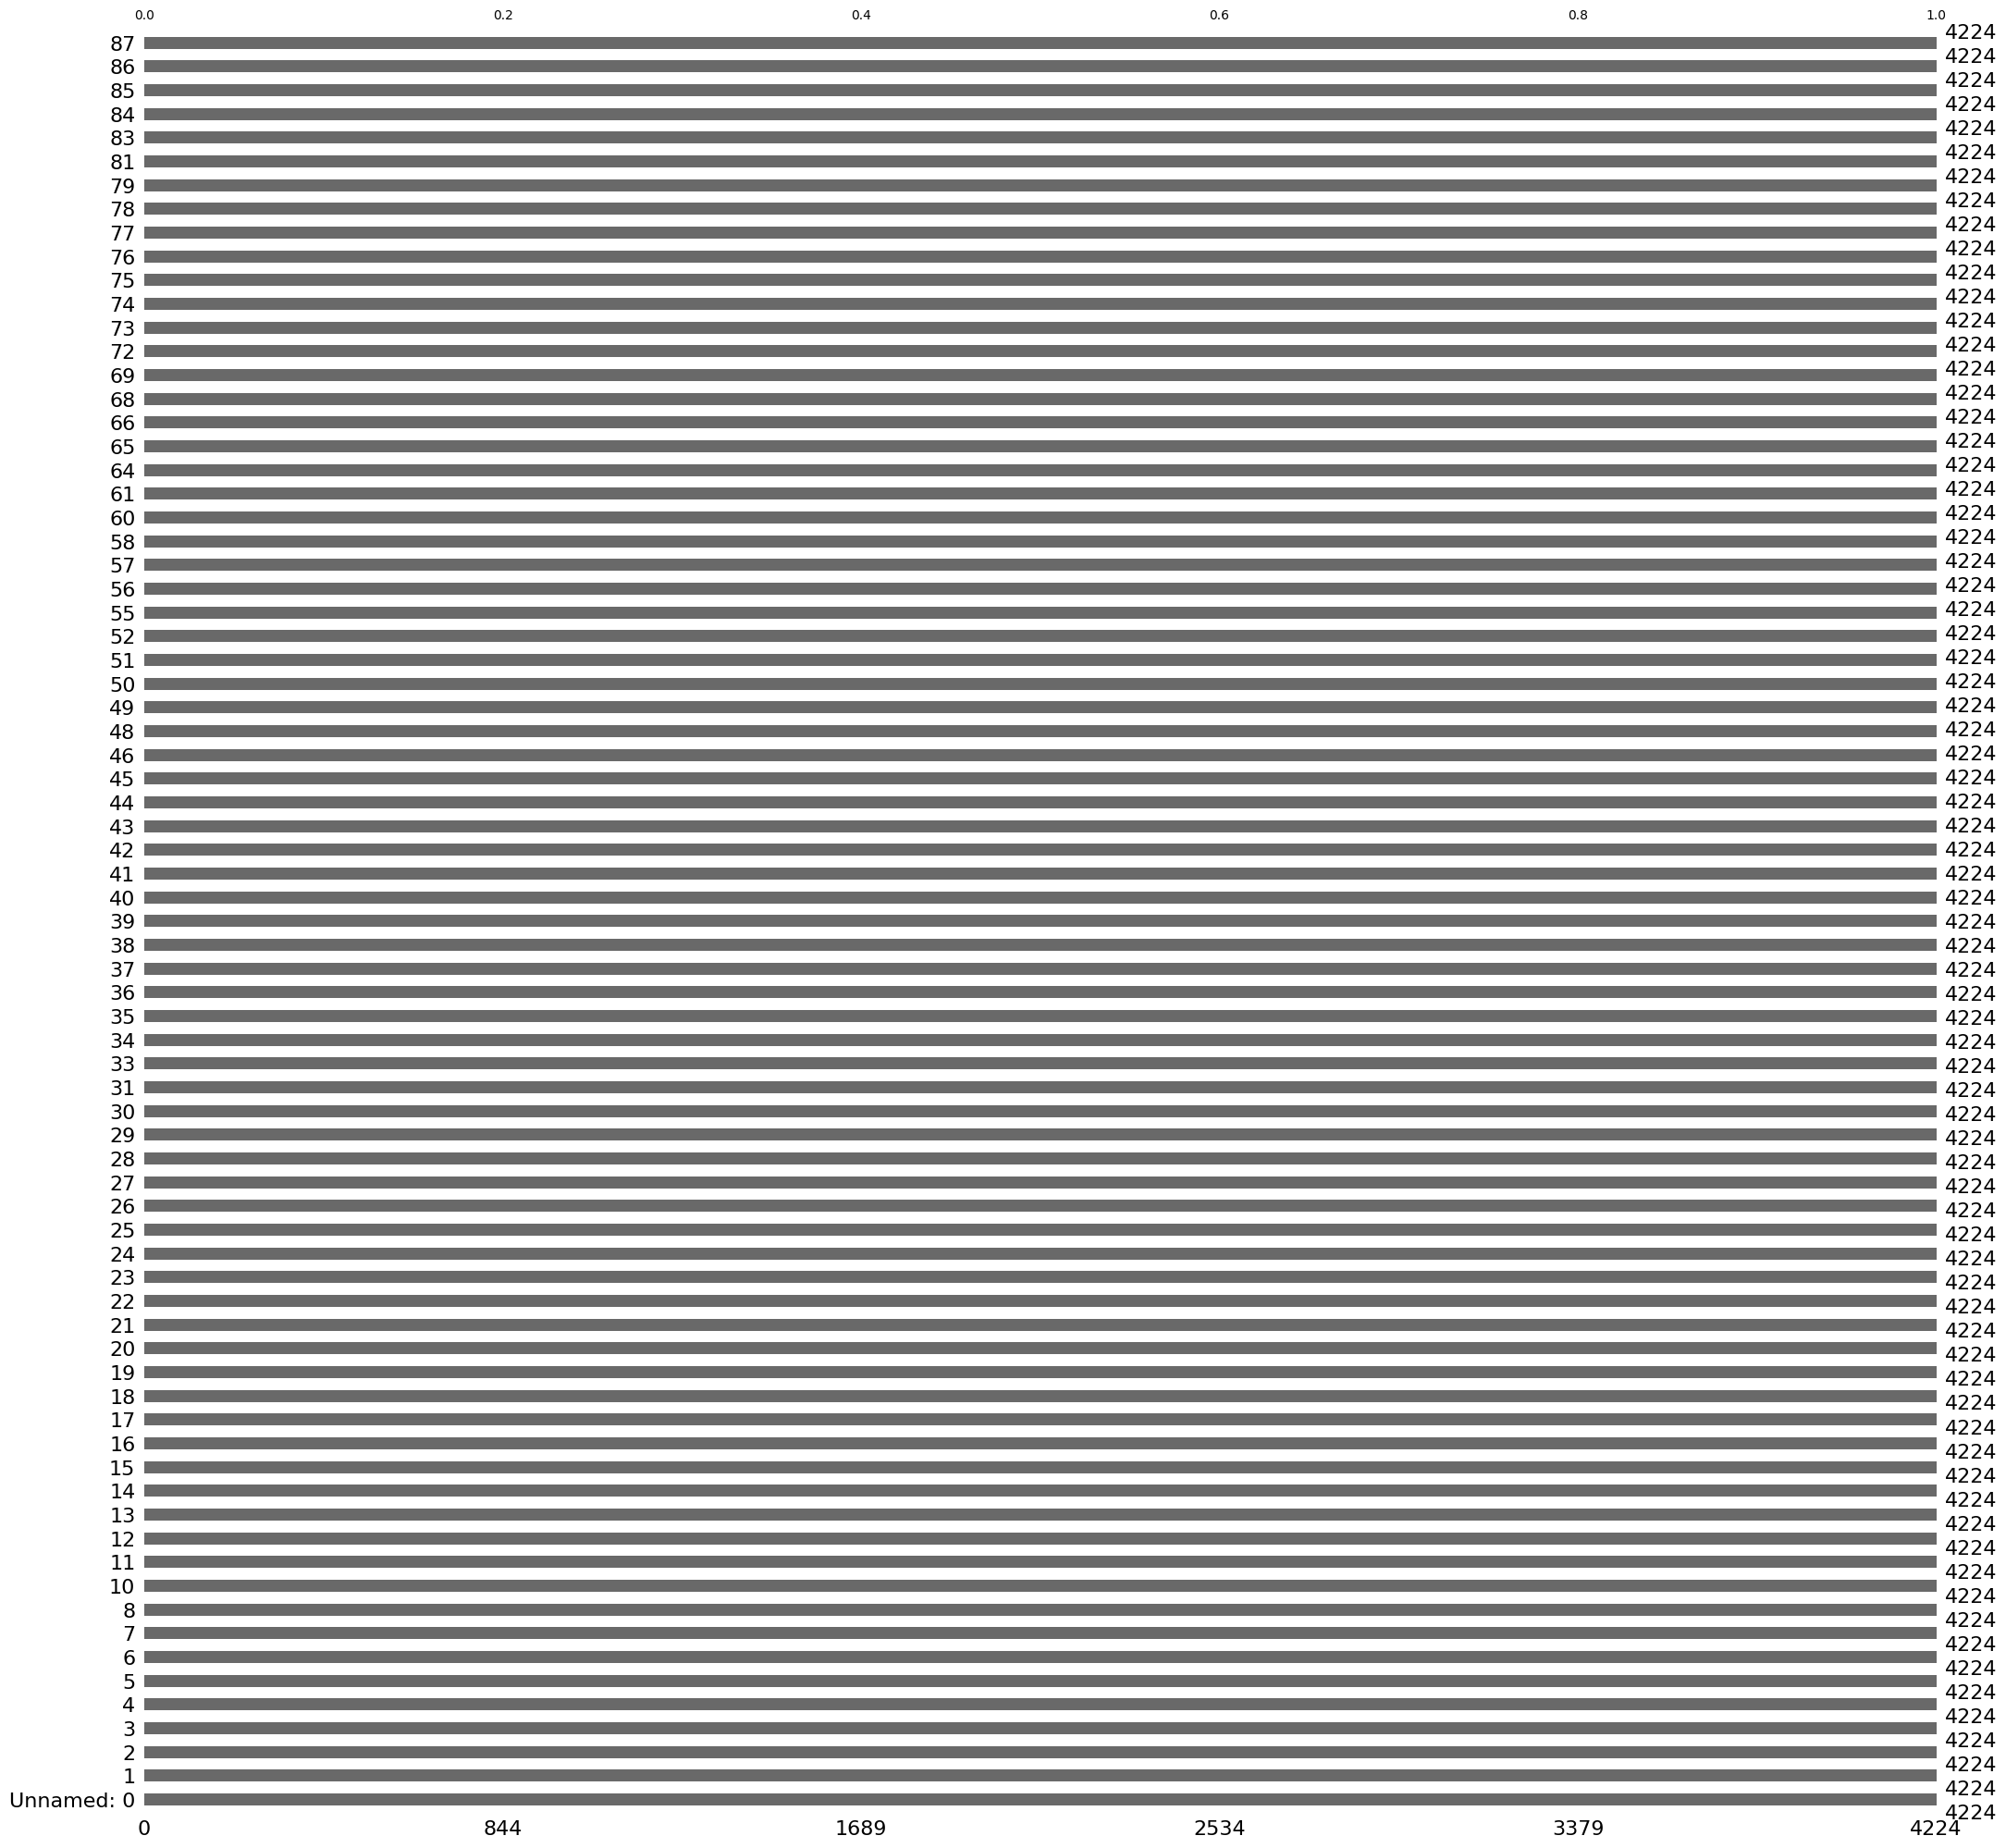

In [7]:
# msno.matrix(genes)
msno.bar(genes)
# plt.show()

## II b
whiten it, normalize it, scale it. What is appropriate? discuss your choices

In [8]:
scaler = skl.preprocessing.StandardScaler()
scaledgenes = scaler.fit_transform(genes)

In [9]:

scaledgenes.mean(0).round(2), scaledgenes.std(0)
# scaledgenes.mean(0).round(2).shape

(array([-0.,  0., -0.,  0., -0., -0., -0.,  0., -0., -0.,  0.,  0., -0.,
         0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0., -0., -0.,  0.,  0.,
         0., -0., -0.,  0.,  0., -0.,  0., -0.,  0., -0., -0.,  0., -0.,
        -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0.,
         0.,  0.,  0., -0.,  0., -0.,  0., -0., -0.,  0.,  0., -0.,  0.,
         0., -0., -0., -0.,  0., -0.,  0.,  0., -0., -0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.]))

# III Visualize the data


## III-a calculate and plot a t-SNE rojection of the data on an optimal 2D plane

In [10]:
tsne = skl.manifold.TSNE()



The hyperparameteres perplexity and possibly early_exaggeration may significantly impact the result. Find values that give you some structure in the data. Make sure you read the docstring and info on tSNE!

In [16]:
#delete
tsne = skl.manifold.TSNE(n_components=2, perplexity=80, early_exaggeration=12)
twodproj = tsne.fit_transform(scaledgenes)



In [17]:
twodproj.shape

(4224, 2)

plot the TSNE 2D projection


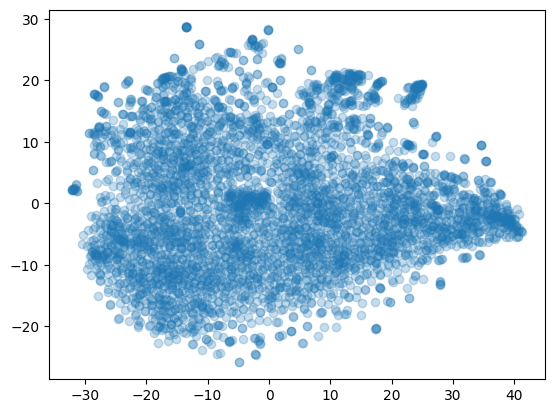

In [18]:
plt.scatter(twodproj[:,0],twodproj[:,1],alpha= 0.25)
# plt.plt(twodproj[:,0],twodproj[:,1],alpha= 0.25)

## III-b calculate and plot the UMAP 2D projection

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(4224, 2)


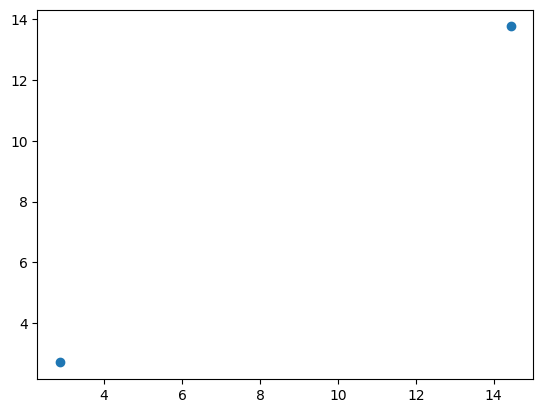

In [14]:
mapper = umap.UMAP(n_components=2, random_state=42).fit_transform(scaledgenes)
print(mapper.shape)
# ax = plt.subplot()
# # umap.plot.points(mapper.transform)
plt.scatter(mapper[0], mapper[1])

# IV K-MEANS Clustering

## IV-a find the best number of culsters for this dataset

create a function that measures the intracluster variance

the intracluster variance is the sum of the variance of each cluster
$V =\sum_J \sum_i{(X_{i\in j} - \bar{X_j})^2}$ for $i$ points in $j$ clusters

In [15]:
#delete
def calICVar(X, labels):
    """calculates the intracluster variance of the k-MEANS algorithm
    X: the input data (ndarray)
    labels: the labels indicating the cluster of each datapoint: same number of data as X
    """
    label_var = []
    for label in labels:
      Xm = np.mean(X[labels ==label])
      label_var.append(np.sum((X[labels ==label] -Xm)**2))

    icvar = np.sum(label_var)
    return icvar


In [21]:
k_means = cluster.KMeans(n_clusters = 2).fit(scaledgenes)
k_means.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[ 0.10669032, -0.98101737, -0.78148269, -0.66695637, -0.84769529,
        -0.84945432, -0.66266352, -0.45057042, -0.51535586, -0.42161863,
        -0.86540554, -0.67944308, -0.93094906, -0.4448076 , -0.42435977,
        -0.89583817, -0.82764132, -0.68311051, -0.90623139, -0.89672501,
        -0.25008463, -0.70797556, -0.84246677, -0.66268879, -0.97031426,
        -0.80353612, -0.90691102, -0.86782703, -0.90705193, -0.68397725,
        -0.79134586, -0.86508944, -0.56085266, -0.69728503, -0.72324478,
        -0.27769679, -0.59593695, -0.56793059, -0.83881564, -0.6530859 ,
        -0.35651519, -0.66954171, -0.71508358, -0.94569511, -0.74177714,
        -0.77899192, -0.97308246, -0.68100249, -0.49842597, -0.60361673,
        -0.39072905, -1.0273899 , -0.86768501, -1.00516996, -1.0166306 ,
        -1.00640972, -0.84760951, -0.84837527, -0.7770357 , -0.80350571,
        -0.69539877, -0.64302286, -0.91399109, -0.35765056, -1.02029479,
        -0.55525428, -0.8686966 , -0.81567631, -0.9

cluster the data with K-Means using 1 to 10 clusters. Calculate the intracluster variance and look for an "elbow" in the value of the intracluster variance as a function of number of clusters/ What is the optimal number of clusters?

In [22]:
vars = [] #list of intracluster variance values for KMeans being run with 1->10 clusters
for i in range(10):
  k_means = cluster.KMeans(n_clusters = i+1).fit(scaledgenes)
  labels= k_means.labels_
  vars.append(calICVar(scaledgenes, labels))




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

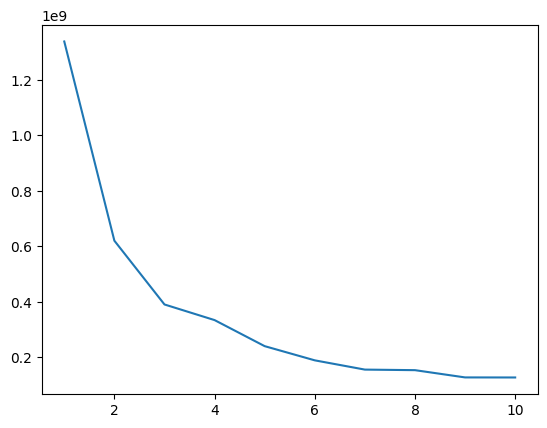

In [24]:
# elbow plot
plt.plot(list(range(1, 11)), vars)

Based on the elbow plot above (see also slides) what is the right number of clusters for this dataset? DISCUSS!

## based on the elbow plot I think it is 3 as after 3 the slope of decrease in abrutly decreased

## IV-b Cluster the data with k-Means into the number of clusters as determined from the elbow

In [ ]:
geneclustersKM = k_means = cluster.KMeans(n_clusters = i+1).fit_transform(scaledgenes)


## IV-c plot and plot the t-SNY and UMAP projections of the data using the cluster number as color

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


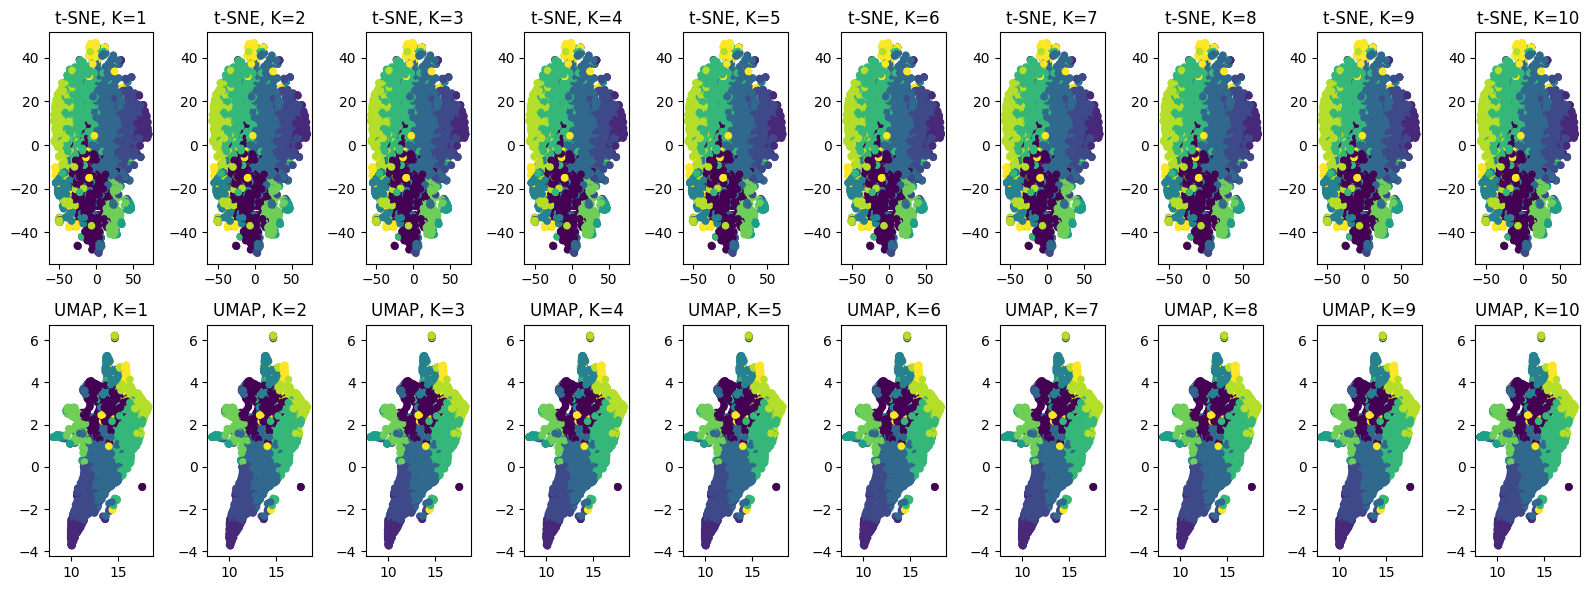

In [25]:
cluster_numbers = range(1, 11)

# Create empty lists to store t-SNE and UMAP projections
tsne_projections = []
umap_projections = []

# Perform K-means clustering with different numbers of clusters
for num_clusters in cluster_numbers:
    kmeans = cluster.KMeans(n_clusters=num_clusters)
    cluster_assignments = kmeans.fit_predict(scaledgenes)

    # Use t-SNE to project the data into 2D
    tsne = skl.manifold.TSNE(n_components=2, random_state=42)
    tsne_projection = tsne.fit_transform(scaledgenes)
    tsne_projections.append(tsne_projection)

    # Use UMAP to project the data into 2D
    umap_model = umap.UMAP(n_components=2, random_state=42)
    umap_projection = umap_model.fit_transform(scaledgenes)
    umap_projections.append(umap_projection)

# Plot the t-SNE and UMAP projections with cluster numbers as colors
plt.figure(figsize=(16, 6))

for i, num_clusters in enumerate(cluster_numbers):
    plt.subplot(2, len(cluster_numbers), i + 1)
    plt.scatter(tsne_projections[i][:, 0], tsne_projections[i][:, 1], c=cluster_assignments, cmap='viridis', s=20)
    plt.title(f't-SNE, K={num_clusters}')

    plt.subplot(2, len(cluster_numbers), len(cluster_numbers) + i + 1)
    plt.scatter(umap_projections[i][:, 0], umap_projections[i][:, 1], c=cluster_assignments, cmap='viridis', s=20)
    plt.title(f'UMAP, K={num_clusters}')

plt.tight_layout()
plt.show()

In [ ]:
umap.plot.points(...

# Use dDSCAN or hierarchical clustering (461 pick either DBSCAN or hierarchical) and redo the clustering. Can you find the same number of clusters?

# V DBSCAN Clustering


## V-a measure the distribution of Euclidean distances

It is important to choose the hyperparamters of DBSCAN wisely. Initialize the _eps_ parameter of DBSCAN based on the mean Euclidean distance. To that end, calculate and plot the Euclidean distance matrix of each point pairs if you have not yet

In [ ]:
dists = sp.spatial.distance.pdist(...

In [ ]:
plt.imshow(...


 make a histogram of the pairwise distances. You should choose a value to initialize dbscan that is below the mean

In [ ]:
plt...

## V-b Rub DBSCAN

initialize the dbscan _eps_ hyperparameter value appropriately and fit a dbscan model to the data plot the 2D TSNE projection colorcoded as before. How many clusters do you have, how many outliers? is that a significant number?

In [ ]:
geneclustersDBS = skl.cluster.DBSCAN(...

np.unique(geneclustersDBS.labels_)

## V-c plot the data in the t-SNE and UMAP projections color-coded by DBSCAN cluster

In [ ]:
plt.scatter(...

In [ ]:
umap.plot.points(...

# VI Agglomerative clustering


## VI-a run agglomerative clustering with standard distance choices: ward linkage and Euclidean distance

In [ ]:
clusteringAg = skl.cluster.AgglomerativeClustering(...

choose ward linkage and plot the dendrogram of the clusters

In [ ]:
Z = linkage(scaledgenes, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

repeat with a different linkage and comment on differences

In [ ]:
Z = ...

# VI-b rerun agglomerative cluatering to get the "ideal" number of clusters as decided by k-means.



In [ ]:
geneclustersAg = skl.cluster.AgglomerativeClustering(n_clusters=...

In [ ]:
geneclustersAg.labels_

## VI-c plot the 2D TSNE projection colorcoded as before

In [ ]:
plt.scatter(...

# VII Comment, in the spirit of https://www.ncbi.nlm.nih.gov/pmc/articles/PMC187526, which was the most "useful" method for clustering